In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## Задание 1

1. Сгенерируйте одну выборку размера 1000 и другую выборку размера 10 из нормально 
распределенной генеральной совокупности с СИЛЬНО отличающимся средним.

In [2]:
normal_1 = np.random.normal(loc=5, size=1000)
normal_2 = np.random.normal(loc=105, size=1000)

2. Посчитайте для объединенной выборки среднее и медиану,
постройте диаграмму «Ящик с усами».

In [3]:
normal = np.concatenate([normal_1, normal_2])

In [4]:
avg_value = normal.mean()
med_value = np.median(normal)

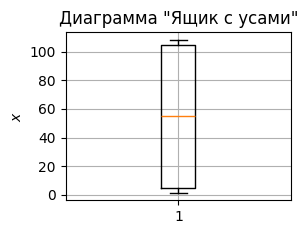

In [5]:
plt.subplot(221)
plt.boxplot(normal)
plt.title('Диаграмма "Ящик с усами"')
plt.ylabel('$x$')
plt.grid()
plt.show()

## Задание 2

1. Из нормально распределенной генеральной совокупности сгенерировать по 1000 раз выборки 
разного объема N (не менее трёх значений N). 

In [6]:
normal_10 = np.random.normal(scale=5, size=(1000,10))
normal_100 = np.random.normal(scale=5, size=(1000,100))
normal_500 = np.random.normal(scale=5, size=(1000,500))

2. Для каждой выборки посчитать дисперсию и исправленную дисперсию.

In [7]:
var_10 = [np.var(normal) for normal in normal_10]
cor_var_10 = [np.var(normal, ddof=1) for normal in normal_10]
var_100 = [np.var(normal) for normal in normal_100]
cor_var_100 = [np.var(normal, ddof=1) for normal in normal_100]
var_500 = [np.var(normal) for normal in normal_500]
cor_var_500 = [np.var(normal, ddof=1) for normal in normal_500]

3. Для каждого N построить диаграмму «Ящик с усами» для двух дисперсий. Отметить на графике истинное значение дисперсии (с которым моделировали выборку). 

In [8]:
def boxplt(var, cor_var, ln):
    plt.boxplot([var, cor_var], positions=[0, 1])
    plt.axhline(y=25, color='red', label='Истинное значение', linestyle='--')
    plt.title(f"Выборка из {ln} элементов")
    plt.legend()
    plt.show()

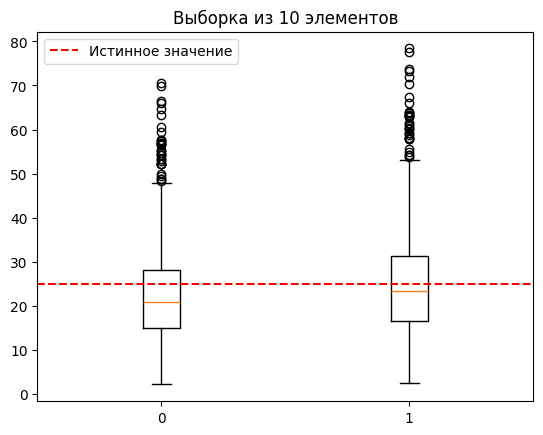

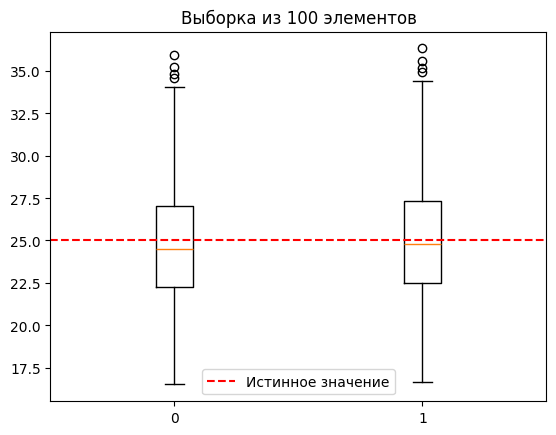

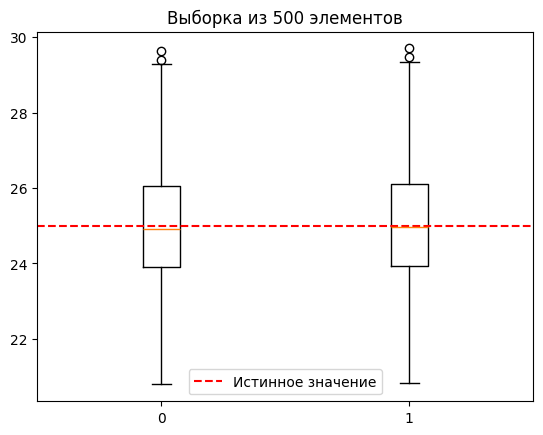

In [9]:
boxplt(var_10, cor_var_10, 10)
boxplt(var_100, cor_var_100, 100)
boxplt(var_500, cor_var_500, 500)

4. Построить следующие графики плотности нормального распределения:
- с заданным мат. ожиданием и заданной дисперсией, 
- заданным мат. ожиданием и выборочной дисперсией (средней по выборке из 1000 дисперсий), 
- заданным мат. ожиданием и исправленной выборочной дисперсией (средней по выборке). 

In [12]:
def four(var, cor_var, ln):
    normal_dist = stats.norm(loc=0, scale=5)
    
    x = np.linspace(-10, 10, 1000)
    pdf = normal_dist.pdf(x)
    plt.plot(x, pdf, label='Заданные параметры')
    
    normal_dist = stats.norm(loc=0, scale=np.mean(var)**0.5)
    pdf = normal_dist.pdf(x)
    plt.plot(x, pdf, label='Выборочная дисперсия')

    normal_dist = stats.norm(loc=0, scale=np.mean(cor_var)**0.5)
    pdf = normal_dist.pdf(x)
    plt.plot(x, pdf,  label='Исправленная дисперсия')

    plt.ylabel('$F(x)$')
    plt.xlabel('$x$')
    plt.title(f"Функция плотности, {ln} элементов")
    plt.legend()
    plt.show()

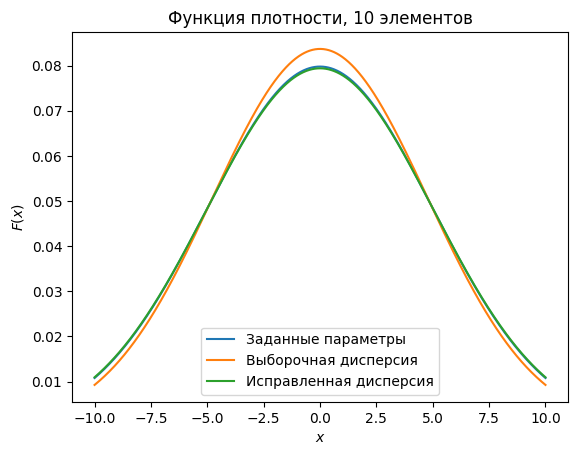

In [13]:
four(var_10, cor_var_10, 10)

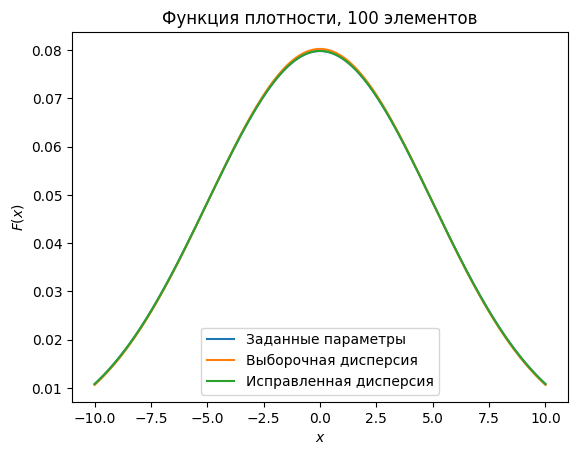

In [14]:
four(var_100, cor_var_100, 100)

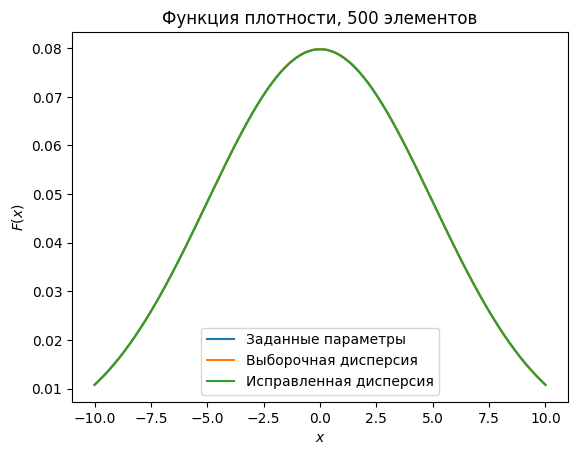

In [15]:
four(var_500, cor_var_500, 500)

## Задание 3

1. Смоделируйте выборку размера N=50. 
2. Постройте 95% доверительный интервал для среднего.

In [16]:
sigma, mean = 1, 5
n = 50

normal = np.random.normal(loc=mean, scale=sigma, size=n)

mean_of_normal = np.mean(normal)
sigma_of_mean = stats.sem(normal)

In [17]:
interval = stats.norm.interval(confidence=0.95, loc=mean_of_normal, scale=sigma_of_mean)
print('Доверительны интервал [{:4.2f}; {:4.2f}]'.format(interval[0], interval[1]))

Доверительны интервал [4.76; 5.24]


3. Посмотрите, как меняется доверительный интервал в зависимости от размера выборки, 
дисперсии и уровня значимости (99%, 95%, 90% доверительные интервалы). 

In [20]:
normal = np.random.normal(loc=mean, scale=sigma, size=n)
mean_of_normal = np.mean(normal)
sigma_of_mean = stats.sem(normal)
interval = stats.norm.interval(confidence=0.99, loc=mean_of_normal, scale=sigma_of_mean)
print('Доверительны интервал [{:4.2f}; {:4.2f}]'.format(interval[0], interval[1]))

Доверительны интервал [4.67; 5.36]


In [21]:
normal = np.random.normal(loc=mean, scale=sigma, size=n)
mean_of_normal = np.mean(normal)
sigma_of_mean = stats.sem(normal)
interval = stats.norm.interval(confidence=0.95, loc=mean_of_normal, scale=sigma_of_mean)
print('Доверительны интервал [{:4.2f}; {:4.2f}]'.format(interval[0], interval[1]))

Доверительны интервал [4.31; 4.89]


In [22]:
normal = np.random.normal(loc=mean, scale=sigma, size=n)
mean_of_normal = np.mean(normal)
sigma_of_mean = stats.sem(normal)
interval = stats.norm.interval(confidence=0.90, loc=mean_of_normal, scale=sigma_of_mean)
print('Доверительны интервал [{:4.2f}; {:4.2f}]'.format(interval[0], interval[1]))

Доверительны интервал [4.78; 5.22]


4. Для сравнения полученных по выборке интервалов с настоящим: 1000 раз смоделируйте выборку размера N=50, посчитайте среднее. Постройте по полученной выборке средних доверительный интервал, сравните результаты. Увеличьте размер выборки.

In [24]:
normals = np.random.normal(loc=mean, scale=sigma, size=(1000,50))
normals_mean = [np.mean(normal) for normal in normals]

In [25]:
mean_of_normal = np.mean(normals_mean)
sigma_of_mean = stats.sem(normals_mean)

In [26]:
interval = stats.norm.interval(confidence=0.95, loc=mean_of_normal, scale=sigma_of_mean)
print('Доверительны интервал [{:4.2f}; {:4.2f}]'.format(interval[0], interval[1]))

Доверительны интервал [4.99; 5.01]
